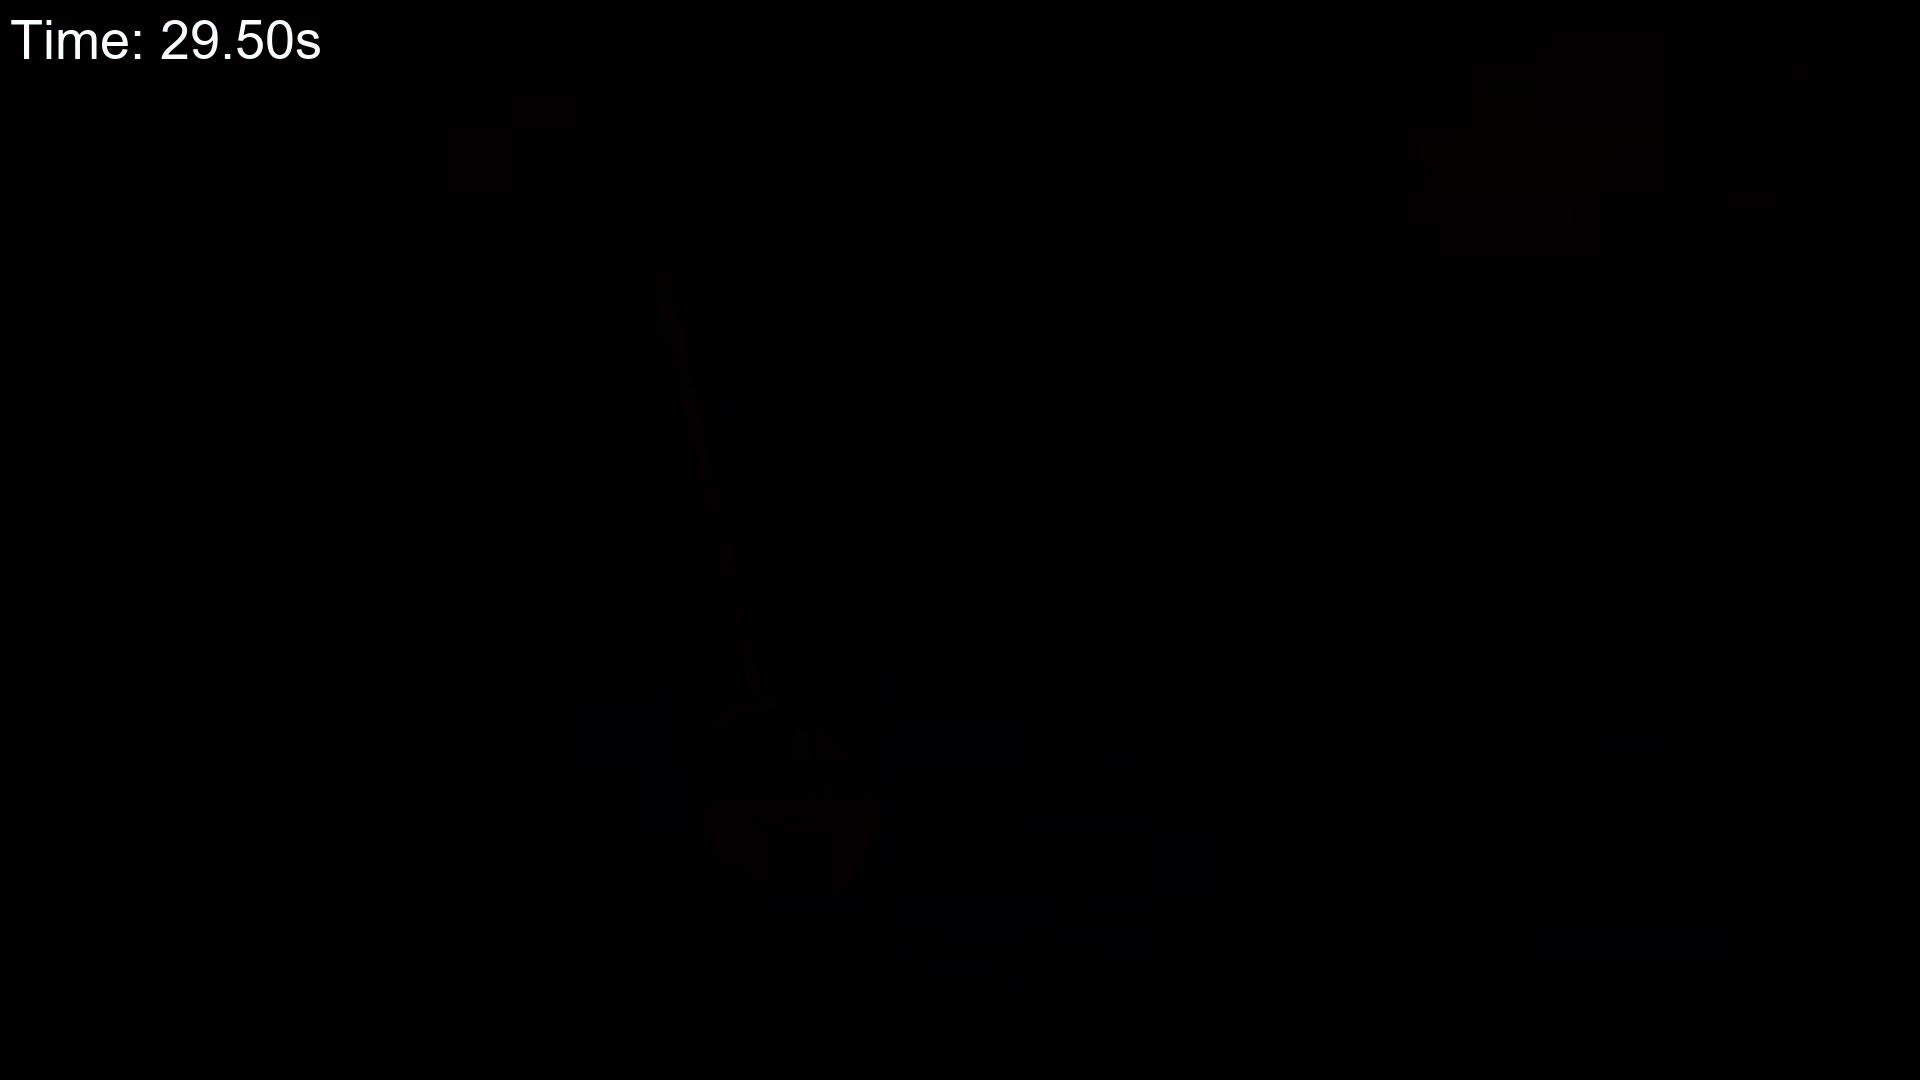

Length of image array: 60


In [1]:
from openai import OpenAI
from IPython.display import display, Image, Audio
import cv2
import base64
import time

client = OpenAI()

base64Frames = []
video = cv2.VideoCapture("output.mp4")
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

# check loading of video
display_handle = display(None, display_id=True)
print(f"Length of image array: {len(base64Frames)}")
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8")), width=600))
    time.sleep(0.025)

In [2]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Can you describe what happens in the video, noting the timestamp of key events?",
            *map(lambda x: {"image": x, "resize": 300}, base64Frames[0::1]),
        ],
    },
]
params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
}
result = None
try:
    result = client.chat.completions.create(**params)
except Exception as e:
    # this is dumb, probably shouldn't do this
    print("Trying again...")
    pass

In [3]:
print(f"Completion tokens used: {result.usage.completion_tokens}")
print(f"Prompt tokens used: {result.usage.prompt_tokens}")
print(f"Total tokens used: {result.usage.total_tokens}")
print(result.choices[0].message.content)

Completion tokens used: 414
Prompt tokens used: 55655
Total tokens used: 56069
Sure, here is a description of the video along with the timestamps of key events:

- **0.00s**: The screen is completely black.
- **0.50s**: A close-up of boots stepping onto what seems to be a train.
- **1.00s - 2.50s**: The boots have boarded the train fully, and the door closes.
- **4.50s**: The screen goes black again.
- **5.00s**: The scene changes to inside the train with three seated characters.
- **5.50s - 7.50s**: The characters remain seated, two appear to be looking straight ahead, one is reading a book.
- **9.50s - 10.50s**: The camera zooms in on the character seated in the center, who appears to be meditative.
- **12.00s - 12.50s**: The scene transitions to an outdoor setting, focusing on the central character who is now wearing different attire, like a summer outfit.
- **14.00s**: The character turns to look to the side, revealing a relaxing backdrop, like a beach setting.
- **15.00s**: The sc